# Numpy, Pandas, and Matplotlib Example

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] =14

### Practice with numpy

Let's get started with generating some example arrays.

In [47]:
A = np.arange(0,10)
print("A:", A)

B = np.arange(0,100,10)
print("B:", B)

C = np.linspace(0,1,9)
print("C:", C)

np.random.seed(0)
D = np.random.random(10)
print("D:",D)

E = np.random.randint(100, size=(20))
print("E:",E)

F = np.random.random((5,5))
print("F:",F)

A: [0 1 2 3 4 5 6 7 8 9]
B: [ 0 10 20 30 40 50 60 70 80 90]
C: [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
D: [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
E: [39 87 46 88 81 37 25 77 72  9 20 80 69 79 47 64 82 99 88 49]
F: [[0.46147936 0.78052918 0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194 0.26455561 0.77423369]
 [0.45615033 0.56843395 0.0187898  0.6176355  0.61209572]
 [0.616934   0.94374808 0.6818203  0.3595079  0.43703195]
 [0.6976312  0.06022547 0.66676672 0.67063787 0.21038256]]


Let's get some information about the size/shape/dimension of the data we generated.

In [48]:
print("Shape E:", E.shape)
print("Shape F:", F.shape)
print("Size E:", E.size)
print("Size F:", F.size)
print("Ndim E:", E.ndim)
print("Ndim F:", F.ndim)

Shape E: (20,)
Shape F: (5, 5)
Size E: 20
Size F: 25
Ndim E: 1
Ndim F: 2


Let's practice indexing into and slicing the array.

In [49]:
print(A)
# print(A[:5])
# print(A[-1])
# print(A[:-1])
# print(A[1:-1])
# print(A[::2])
# print(A[::-1])

[0 1 2 3 4 5 6 7 8 9]


Let's now calculate with some data: addition, subtraction, multiplication, division, scalar multiplication, and statistics.

In [50]:
np.random.seed(0)
X = np.random.random(10)
Y = np.random.random(10)
print(X,Y)
Z = X+Y
Z = X-Y
Z = X*Y
Z = X/Y
Z = X*2
print(np.mean(X), np.std(X), np.min(X), np.max(X))

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152] [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
 0.0202184  0.83261985 0.77815675 0.87001215]
0.6157662833145425 0.18447489445957163 0.3834415188257777 0.9636627605010293


### Reading in the data

Our first step is to read in the CSV file that contains the population data we're interested in working with.

In [51]:
# Read in CSV here
pop_df = pd.read_csv("data-USstates-master\data-USstates-master\state-population.csv")
print(pop_df)

     state/region     ages  year   population
0              AL  under18  2012    1117489.0
1              AL    total  2012    4817528.0
2              AL  under18  2010    1130966.0
3              AL    total  2010    4785570.0
4              AL  under18  2011    1125763.0
...           ...      ...   ...          ...
2539          USA    total  2010  309326295.0
2540          USA  under18  2011   73902222.0
2541          USA    total  2011  311582564.0
2542          USA  under18  2012   73708179.0
2543          USA    total  2012  313873685.0

[2544 rows x 4 columns]


We can see information about the data file through both info() and describe().

In [52]:
pop_df.info()
pop_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state/region  2544 non-null   object 
 1   ages          2544 non-null   object 
 2   year          2544 non-null   int64  
 3   population    2524 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB


,year,population
count,2544.000000,2.524000e+03
mean,2001.500000,6.805558e+06
std,6.923547,2.855014e+07
min,1990.000000,1.013090e+05
25%,1995.750000,7.423805e+05
50%,2001.500000,1.597005e+06
75%,2007.250000,4.547104e+06
max,2013.000000,3.161288e+08


For convenience sake, we want to rename the column state/region to abbreviation.

In [53]:
# Rename column
pop_df.rename(columns={"state/region":"abbreviation"}, inplace=True)
print(pop_df)

     abbreviation     ages  year   population
0              AL  under18  2012    1117489.0
1              AL    total  2012    4817528.0
2              AL  under18  2010    1130966.0
3              AL    total  2010    4785570.0
4              AL  under18  2011    1125763.0
...           ...      ...   ...          ...
2539          USA    total  2010  309326295.0
2540          USA  under18  2011   73902222.0
2541          USA    total  2011  311582564.0
2542          USA  under18  2012   73708179.0
2543          USA    total  2012  313873685.0

[2544 rows x 4 columns]


### Down-selecting the Data

Suppose we want to visualize how the population of Tennessee has changed based on this dataset. First, we want to select only the data associated with Tennessee and sort it based on the year.  We will create a new dataframe with only the Tennessee data. We can then sort by the year.

In [54]:
# Down-select data
tn_df = pop_df[pop_df["abbreviation"] == "TN"].sort_values("year")
print(tn_df)

     abbreviation     ages  year  population
2063           TN    total  1990   4894492.0
2062           TN  under18  1990   1220200.0
2060           TN    total  1991   4966587.0
2061           TN  under18  1991   1233260.0
2057           TN    total  1992   5049742.0
2056           TN  under18  1992   1259458.0
2059           TN  under18  1993   1285044.0
2058           TN    total  1993   5137584.0
2055           TN    total  1994   5231438.0
2054           TN  under18  1994   1310988.0
2053           TN  under18  1995   1331616.0
2052           TN    total  1995   5326936.0
2050           TN  under18  1996   1345723.0
2051           TN    total  1996   5416643.0
2047           TN  under18  1997   1359030.0
2046           TN    total  1997   5499233.0
2049           TN    total  1998   5570045.0
2048           TN  under18  1998   1369987.0
2043           TN  under18  1999   1385997.0
2042           TN    total  1999   5638706.0
2045           TN  under18  2000   1399685.0
2044      

### Extracting Numpy Arrays from Dataframes

Suppose we want to plot how the under 18 population and the total population has changed throughout this dataset.  We can extract the year, the under 18 population, and the total population into three separate numpy arrays.

In [55]:
# Extra Numpy Array
years = np.array(tn_df[tn_df["ages"] == "total"]["year"])
under18 = np.array(tn_df[tn_df["ages"] == "under18"]["population"])
total = np.array(tn_df[tn_df["ages"] == "total"]["population"])

## Plotting a Line Plot

Now we're ready to plot how the populations are changing in a line plot.

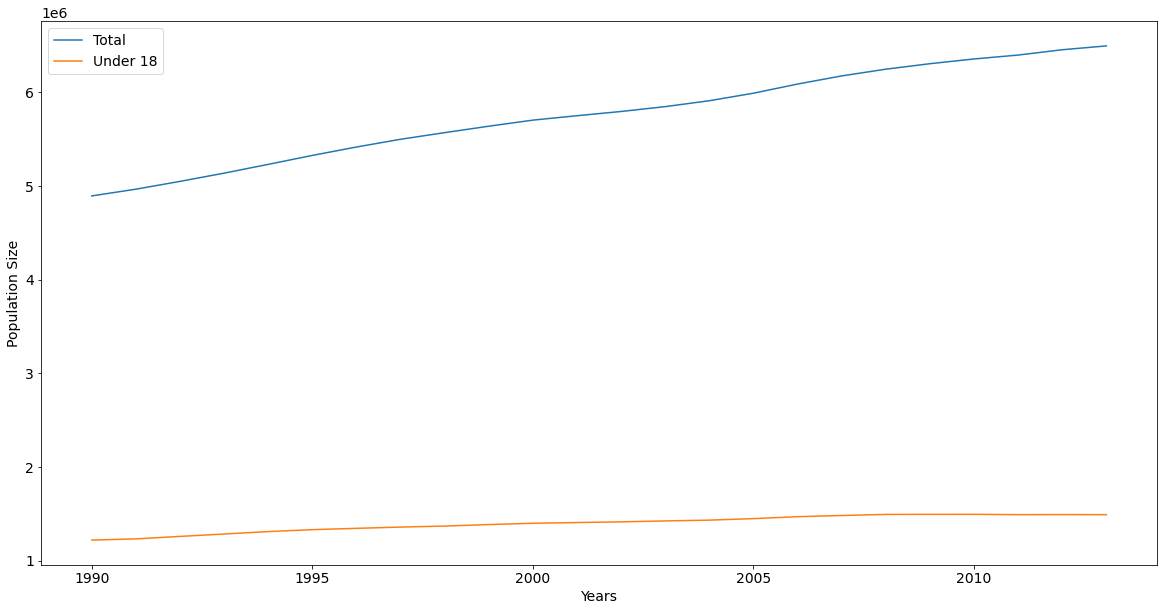

In [56]:
# Plot line plot. Don't forget axis labels!
plt.plot(years, total, label="Total")
plt.plot(years, under18, label="Under 18")
plt.xlabel("Years")
plt.ylabel("Population Size")
plt.legend()
plt.show()

### Plotting a Bar Chart

We can visualize this same information via a bar chart.

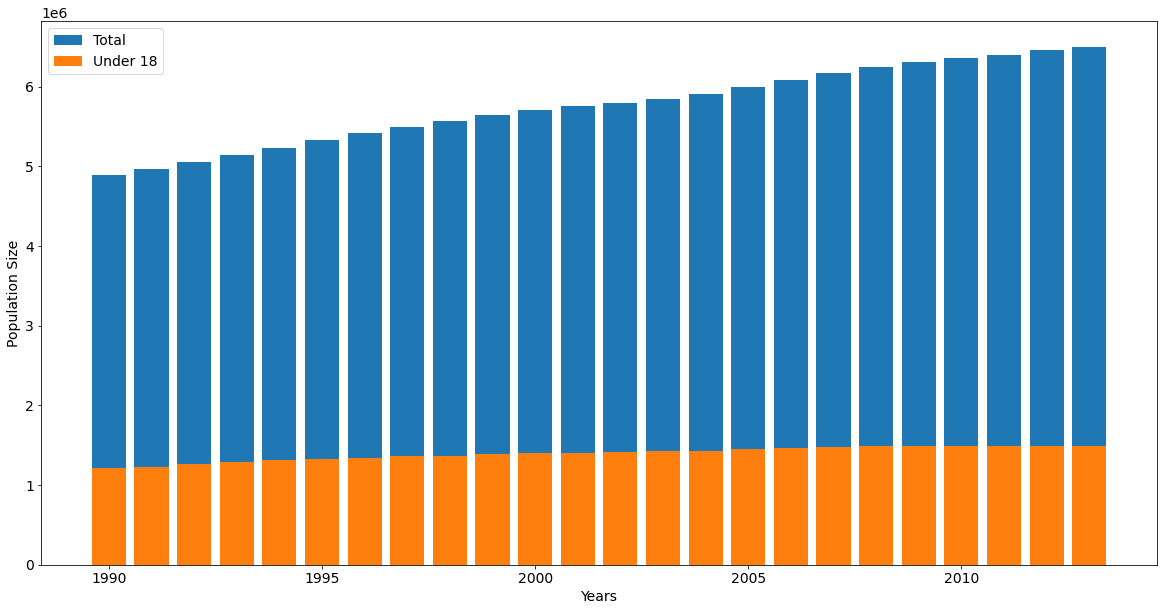

In [57]:
# Bar chart
plt.bar(years, total, label="Total")
plt.bar(years, under18, label="Under 18")
plt.xlabel("Years")
plt.ylabel("Population Size")
plt.legend()
plt.show()

### Manipulating Data with Numpy

Let's use numpy to calculate the fraction of the total population that is under 18 each year.

[0.24930064 0.24831137 0.24941037 0.25012613 0.25059802 0.24997785
 0.24844225 0.24713083 0.24595618 0.24580054 0.24539866 0.24476259
 0.24411267 0.24365711 0.24249523 0.24191491 0.24145549 0.2400927
 0.23919572 0.23702545 0.23519971 0.23315924 0.23124847 0.22961546]


<BarContainer object of 24 artists>

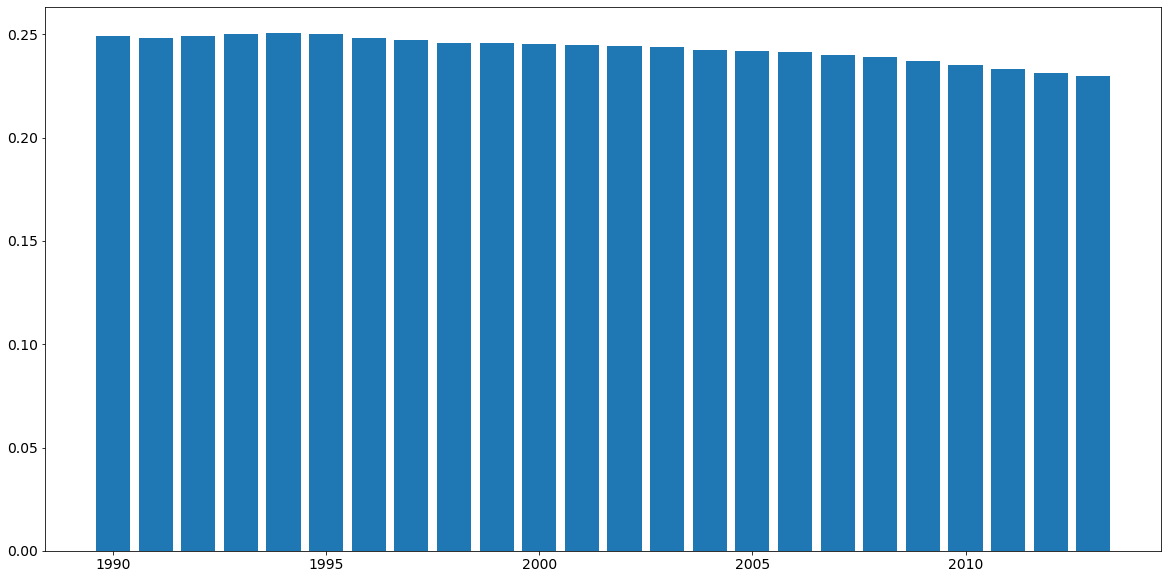

In [58]:
# Calculate and plot fraction under 18
frac_under18 = under18/total
print(frac_under18)
plt.bar(years, frac_under18)

### Reading multiple CSV files into different data frames

In [59]:
# Read in new CSVs into different data frames
area_df = pd.read_csv("data-USstates-master/data-USstates-master/state-areas.csv")
abbrev_df = pd.read_csv("data-USstates-master/data-USstates-master/state-abbrevs.csv")

### Merging multiple dataframes together

If there are common columns across dataframes, you can merge them together.

In [60]:
# Merge data frames together
cdf = pd.merge(pop_df, abbrev_df)
cdf = pd.merge(cdf, area_df)
cdf = cdf.sort_values("abbreviation")
print(cdf)

     abbreviation     ages  year  population    state  area (sq. mi)
71             AK  under18  2001    188771.0   Alaska         656425
69             AK  under18  2000    190615.0   Alaska         656425
68             AK    total  2000    627963.0   Alaska         656425
67             AK    total  1999    624779.0   Alaska         656425
66             AK  under18  1999    191422.0   Alaska         656425
...           ...      ...   ...         ...      ...            ...
2418           WY    total  2003    503453.0  Wyoming          97818
2419           WY  under18  2003    124182.0  Wyoming          97818
2420           WY    total  2004    509106.0  Wyoming          97818
2422           WY    total  2002    500017.0  Wyoming          97818
2447           WY    total  1990    453690.0  Wyoming          97818

[2448 rows x 6 columns]


### Downselecting based on Multiple Conditions

We can use multiple conditions to downselect in a dataframe. For example, suppose we only want the total population for each state in the year 2013.

In [61]:
# Down-select with multiple conditions
df = cdf[(cdf["ages"] == "total") & (cdf["year"] == 2013)]
print(df)

     abbreviation   ages  year  population                 state  \
87             AK  total  2013    735132.0                Alaska   
9              AL  total  2013   4833722.0               Alabama   
185            AR  total  2013   2959373.0              Arkansas   
103            AZ  total  2013   6626624.0               Arizona   
199            CA  total  2013  38332521.0            California   
281            CO  total  2013   5268367.0              Colorado   
295            CT  total  2013   3596080.0           Connecticut   
391            DC  total  2013    646449.0  District of Columbia   
375            DE  total  2013    925749.0              Delaware   
473            FL  total  2013  19552860.0               Florida   
486            GA  total  2013   9992167.0               Georgia   
569            HI  total  2013   1404054.0                Hawaii   
761            IA  total  2013   3090416.0                  Iowa   
582            ID  total  2013   1612136.0      

### Histograms

Suppose we want to find out what the histogram of state populations looks like in 2013.

(array([25., 14.,  6.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([  582658. ,  4357644.3,  8132630.6, 11907616.9, 15682603.2,
        19457589.5, 23232575.8, 27007562.1, 30782548.4, 34557534.7,
        38332521. ]),
 <BarContainer object of 10 artists>)

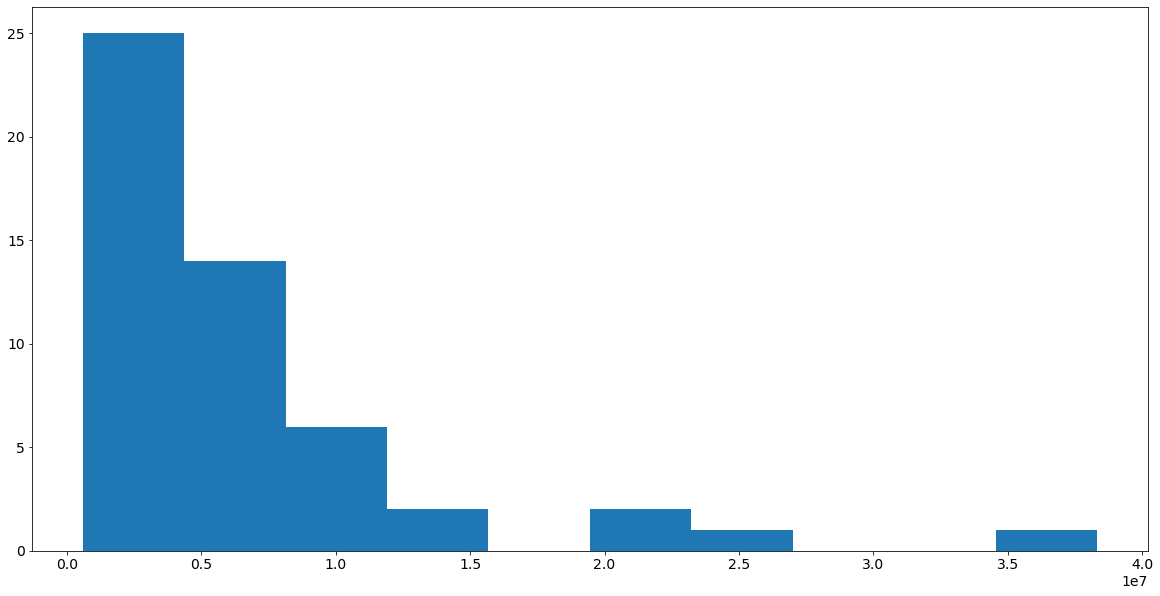

In [62]:
# Histogram of state populations in 2013
plt.hist(df["population"])

### Finding Unique Elements

We can use numpy and unique to find the array of unique elements from a numpy array.

In [63]:
# Find unique list of states
states = np.unique(cdf["abbreviation"])
print(states)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


### Boxplots

Suppose we want to see how much populations have varied in states in this dataset.  Boxplots can be a convenient plotting tool.  Using the unique list of state abbreviations, we can find all of the populations for each state and create a boxplot.

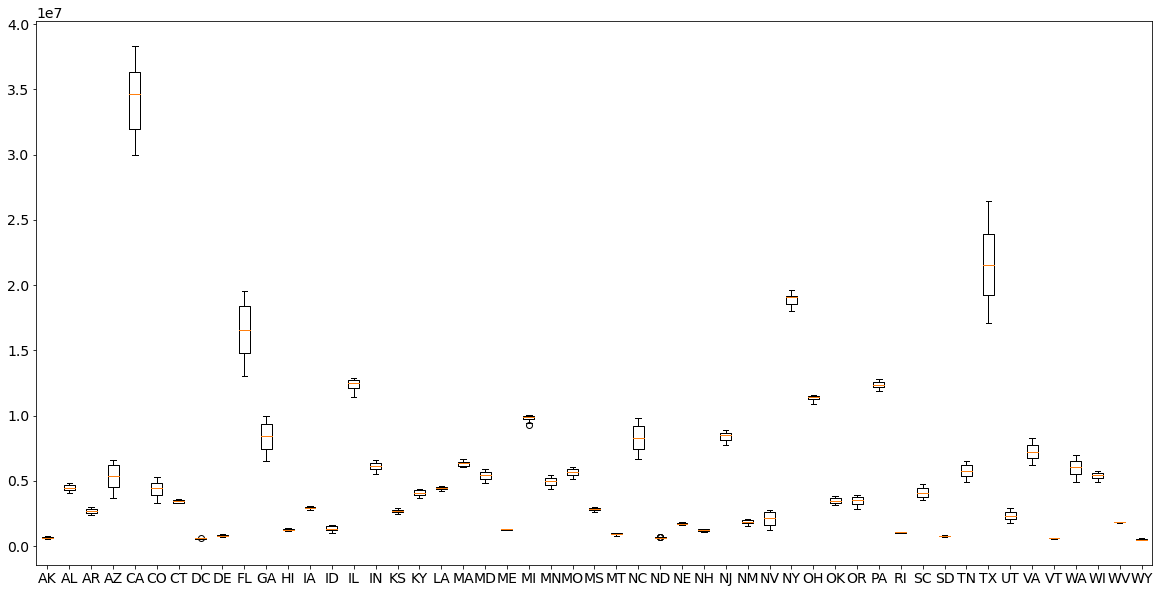

In [67]:
# Extract populations for each state and create the boxplots
populations = []
for state in states:
    population = np.array(cdf[(cdf["abbreviation"] == state) & (cdf["ages"] == "total")]["population"])
    populations.append(population)
    
plt.boxplot(populations)
plt.xticks(range(1,len(populations)+1),states)
plt.show()

### Scatter Plots

We can visualize the population of the state in 2013 vs. the area of the state using scatter plots.

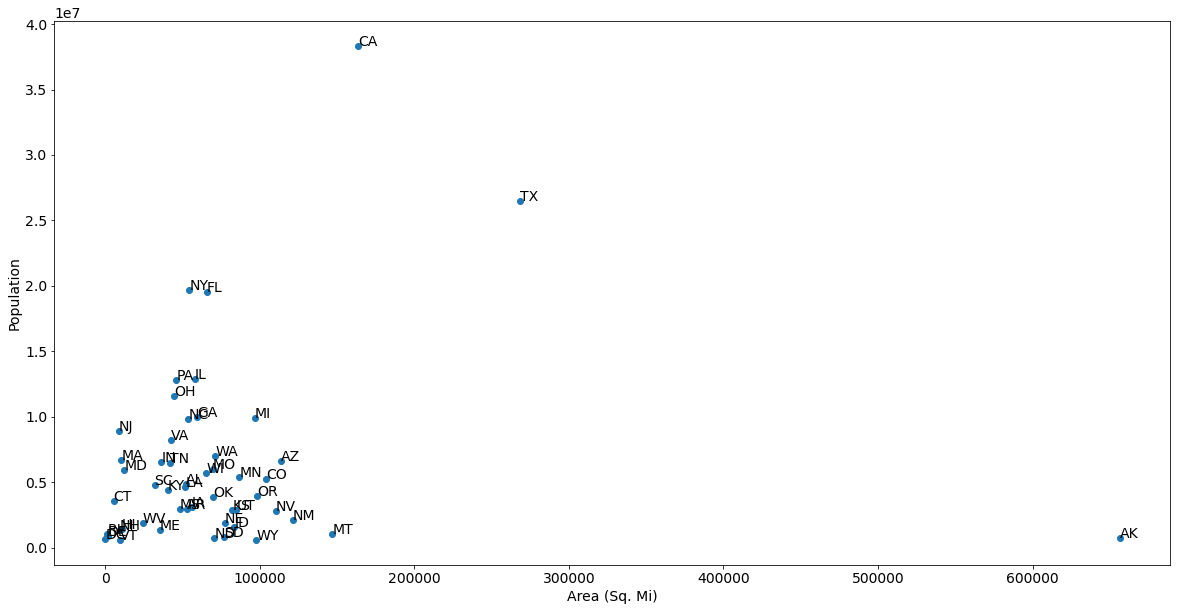

In [65]:
# Create the scatter plot of population vs. area and annotate the points
states = np.unique(cdf[(cdf["ages"] == "total") & (cdf["year"] == 2013)]["abbreviation"])
areas = np.array(cdf[(cdf["ages"] == "total") & (cdf["year"] == 2013)]["area (sq. mi)"])
populations = np.array(cdf[(cdf["ages"] == "total") & (cdf["year"] == 2013)]["population"])

plt.scatter(areas, populations)
plt.xlabel("Area (Sq. Mi)")
plt.ylabel("Population")

for i in range(len(states)):
    plt.annotate(states[i],(areas[i], populations[i]))

### What is a question would you like to answer based on the full combined dataset?